# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [5]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [6]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading:  64%|███████████████████████████████████████████████████████████████████████████████████▍                                              | 4.23M/6.58M [00:00<00:00, 11.1MB/s]

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
# Optional delay for loading the page
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')


[WDM] - Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.58M/6.58M [00:06<00:00, 1.08MB/s]


In [9]:
# Extract all rows of data
table_data = soup.find('table', class_='table')
print(table_data.prettify())

<table class="table">
 <tbody>
  <tr>
   <th>
    id
   </th>
   <th>
    terrestrial_date
   </th>
   <th>
    sol
   </th>
   <th>
    ls
   </th>
   <th>
    month
   </th>
   <th>
    min_temp
   </th>
   <th>
    pressure
   </th>
  </tr>
  <tr class="data-row">
   <td>
    2
   </td>
   <td>
    2012-08-16
   </td>
   <td>
    10
   </td>
   <td>
    155
   </td>
   <td>
    6
   </td>
   <td>
    -75.0
   </td>
   <td>
    739.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    13
   </td>
   <td>
    2012-08-17
   </td>
   <td>
    11
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    740.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    24
   </td>
   <td>
    2012-08-18
   </td>
   <td>
    12
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    741.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    35
   </td>
   <td>
    2012-08-19
   </td>
   <td>
    13
   </td>
   <td>
   

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list

mars_temp_data = []

# Loop through the scraped data to create a list of rows

rows = table_data.find_all('tr', class_='data-row')

for row in rows:
    columns = row.find_all('td')
    
    if(columns != []):
        id = columns[0].text
        date = columns[1].text
        sol = columns[2].text
        ls = columns[3].text
        month = columns[4].text
        min_temp = columns[5].text
        pressure = columns[6].text
        
    mars_temp_data_dict = {"id": id,
                          "terrestrial_date": date,
                          "sol": sol,
                          "ls": ls,
                          "month": month,
                          "min_temp": min_temp,
                          "pressure": pressure}
    mars_temp_data.append(mars_temp_data_dict)

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_temp_data)

In [12]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [25]:
# Change data types for data analysis
updated_df = df.astype({'id':int, 'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure':float})

In [34]:
# Confirm type changes were successful by examining data types again
updated_df.dtypes

id                    int32
terrestrial_date     object
sol                   int32
ls                    int32
month                 int32
min_temp            float64
pressure            float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [40]:
# 1. How many months are there on Mars?
months_count = updated_df["month"].unique()
print("Below is the list of Mars months which are 12 altogether: ")
print(months_count)

Below is the list of Mars months which are 12 altogether: 
[ 6  7  8  9 10 11 12  1  2  3  4  5]


In [38]:
# 2. How many Martian days' worth of data are there?
martian_days_data_beginning = updated_df["sol"].min()
martian_days_data_ending = updated_df["sol"].max()

martian_days_data_range = martian_days_data_ending - martian_days_data_beginning

print(f"Number of Martian days' worth of data: {martian_days_data_range}")
print("Note: This is different from the sample count of 1867 in the previously shown summary stattistics ")

Number of Martian days' worth of data: 1967
Note: This is different from the sample count of 1867 in the previously shown summary stattistics 


In [41]:
# 3. What is the average low temperature by month?

avg_low_temp_by_month = updated_df.groupby(["month"]).mean("min_temp")
avg_low_temp_by_month_df = avg_low_temp_by_month.drop(['id','sol', 'ls', 'pressure'], axis=1)
print(" Average Minimum Temperature By Month: ")
avg_low_temp_by_month_df

 Average Minimum Temperature By Month: 


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<AxesSubplot:xlabel='month'>

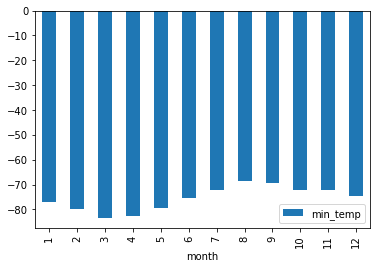

In [42]:
# Plot the average temperature by month
avg_low_temp_by_month_df.plot(kind='bar')

In [43]:
# Identify the coldest and hottest months in Curiosity's location
print(avg_low_temp_by_month_df.min())
print(avg_low_temp_by_month_df.max())
print("March (month 3) has the coldest minimum temperature on Mars at -83.307292:")
print("while August (month 8) has the hottest minimum temperature at -68.382979")

min_temp   -83.307292
dtype: float64
min_temp   -68.382979
dtype: float64
March (month 3) has the coldest minimum temperature on Mars at -83.307292:
while August (month 8) has the hottest minimum temperature at -68.382979


In [45]:
# 4. Average pressure by Martian month
avg_pressure_by_martian_month = updated_df.groupby(["month"]).mean("pressure")
avg_pressure_by_martian_month_df = avg_pressure_by_martian_month.drop(['id', 'sol', 'ls', 'min_temp'], axis=1)
print(" Average Pressure By Martian Month: ")
avg_pressure_by_martian_month_df

 Average Pressure By Martian Month: 


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<AxesSubplot:xlabel='month'>

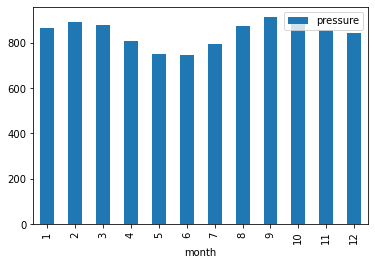

In [46]:
# Plot the average pressure by month
avg_pressure_by_martian_month_df.plot(kind='bar')

In [47]:
# the lowest and the highest atmospheric pressure on Mars.
print(avg_pressure_by_martian_month_df.min())
print(avg_pressure_by_martian_month_df.max())
print("June (month 6) has the lowest atmospheric pressure on Mars at 745.054422:")
print("while September (month 9) has the highest atmospheric pressure at 913.30597")

pressure    745.054422
dtype: float64
pressure    913.30597
dtype: float64
June (month 6) has the lowest atmospheric pressure on Mars at 745.054422:
while September (month 9) has the highest atmospheric pressure at 913.30597


Text(0, 0.5, 'Minimum Temperature')

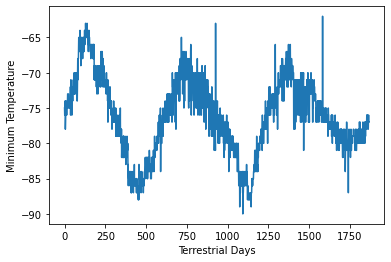

In [49]:
# 5. How many terrestrial (earth) days are there in a Martian year?
updated_df.min_temp.plot()
plt.xlabel("Terrestrial Days")
plt.ylabel("Minimum Temperature")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [50]:
# Write the data to a CSV
updated_df.to_csv("Output/updated_mars_weather.csv", index=False)

In [51]:
browser.quit()